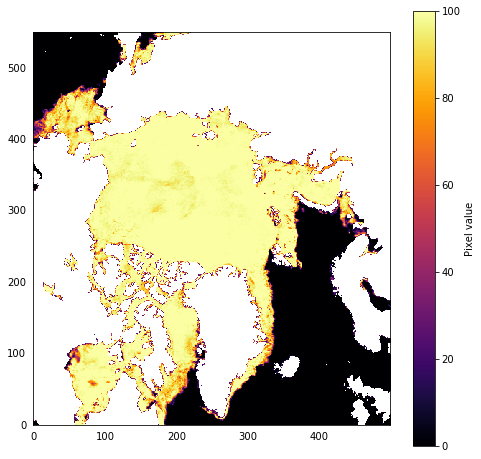

In [1]:
# Part 1 

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
data = np.load('data/ice_data/ice_data/20080415.npy')

'''
k = np.load('data/ice_data/ice_data/20080415.npy')
k[np.isnan(k)] = 0
total = np.sum(k)
total_nan = np.nansum(data)
print total, "--" , total_nan
#print k
'''

rows, columns = data.shape

# print rows, columns

'''
#finding total number of pixels#
h = len(data[np.isnan(data)])
print h
y = len(data[data<=50])
print y
x = len(data[data>50])
print x

print x+y+h
'''

# m = data[x]
# print m.shape

# print (data[data>50]).shape
# print data.ndim

plt.figure(figsize=(8,8))

plt.tick_params(
    axis='both',         
    which='both',      
    right='off',      
    left='off',
    top = 'off',
    bottom = 'off',
    labelleft = 'on',        
    labelbottom='on')

# plt.axis('off')

from pylab import *
plt.imshow(data, origin='lower', cmap=plt.cm.inferno)
colorbar().set_label("Pixel value")
#colorbar()

In [2]:
# Part 2.a

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

day = 15
month = 1
year = 2006

variable_time = np.zeros(137)

# info_date = []

more_than_50_pixels = np.zeros(137)

for i in range(137):
    map = "{0:04d}{1:02d}{2:02d}".format(year, month, day)
    data = np.load('data/ice_data/ice_data/' + map + '.npy')
    
    variable_time[i] = year + (30*(month-1) + day)/360.0
    
    '''
    info_date.append([year, month, day])
    print info_date[i]
    '''
    
    more_than_50_pixels[i] = len(data[data>50])
    
    # print "{0:04d}{1:02d}{2:02d}".format(year, month, day), " {0:9f}".format(variable_time[i]), " {0:6d}".format(int(more_than_50_pixels[i]))
        
    if day == 1:
        day = 15
    elif day == 15:
        day = 1
        month = month + 1
        if month == 13:
            month = 1
            year = year + 1


-c:29: RuntimeWarning: invalid value encountered in greater


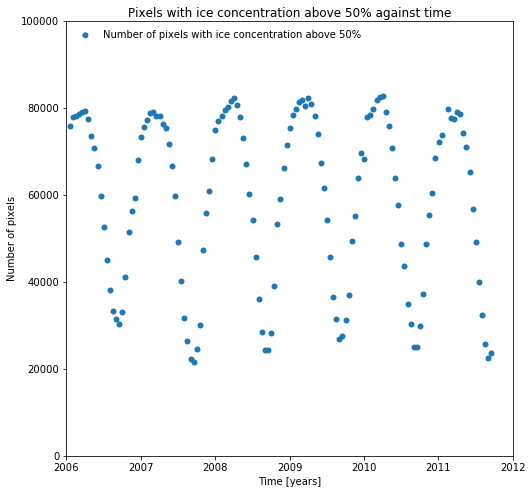

In [3]:
plt.figure(figsize=(8,8))            
plt.scatter(variable_time, more_than_50_pixels, label = "Number of pixels with ice concentration above 50%")

from matplotlib.ticker import ScalarFormatter
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))

plt.xlim(2006,2012)
plt.ylim(0,100000)
plt.title("Pixels with ice concentration above 50% against time")
plt.xlabel("Time [years]")
plt.ylabel("Number of pixels")  
plt.legend(loc="upper left")


-c:40: RuntimeWarning: invalid value encountered in less_equal


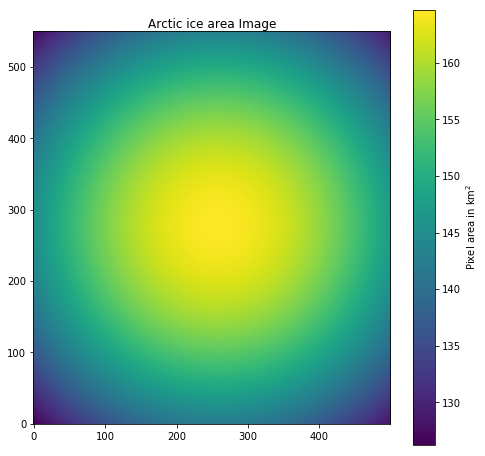

In [4]:
# Part 2.b

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
area = np.load('data/ice_data/ice_data_area.npy')

# print area.shape

from pylab import *

plt.figure(figsize=(8,8))
plt.imshow(area, origin = 'lower')
plt.title("Arctic ice area Image")
a = colorbar()
a.set_label(" Pixel area in km$^2$",)

day = 15
month = 1
year = 2006

variable_time = np.zeros(137)

effective_area = np.zeros(137)
area_more_than_99 = np.zeros(137)

for i in range(137):
    map = "{0:04d}{1:02d}{2:02d}".format(year, month, day)
    data = np.load('data/ice_data/ice_data/' + map + '.npy')
    
    variable_time[i] = year + (30*(month-1) + day)/360.0
    
    # finding effective total area of ice coverage in a given map
    area_map_array = data * (area*0.01)
    effective_area[i] = np.nansum(area_map_array)
    
    # finding total area of ice coverage with ice conc. greater than or equal to 99% in a given map
    more_than_99 = np.load('data/ice_data/ice_data/' + map + '.npy')
    more_than_99[more_than_99 <= 99] = 0 
    area_99_array = more_than_99 * (area*0.01)
    area_more_than_99[i] = np.nansum(area_99_array)
    
    
    # print "{0:04d}{1:02d}{2:02d}".format(year, month, day), " {0:9f}".format(variable_time[i]), " {0:6d}".format(int(more_than_50_pixels[i]))
        
    if day == 1:
        day = 15
    elif day == 15:
        day = 1
        month = month + 1
        if month == 13:
            month = 1
            year = year + 1


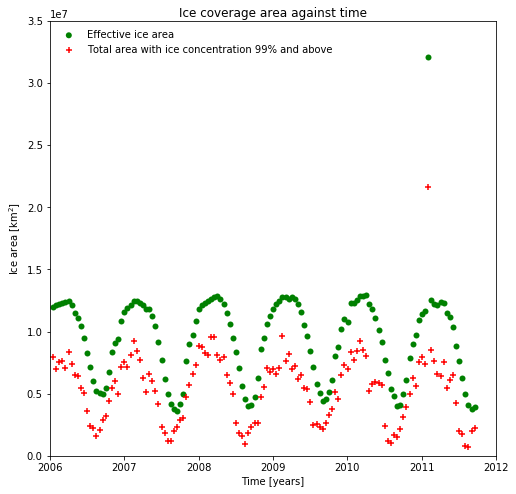

In [5]:
#plt.figure(2)
plt.figure(figsize=(8,8))            
plt.scatter(variable_time, effective_area, marker='o', color='green', label = 'Effective ice area')
plt.scatter(variable_time, area_more_than_99, marker='+', color='red', label = 'Total area with ice concentration 99% and above')

#plt.figure(2)
from matplotlib.ticker import ScalarFormatter
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

#plt.figure(2)
plt.title("Ice coverage area against time")
plt.xlim(2006,2012)
plt.ylim(0,35000000)
plt.xlabel("Time [years]")
plt.ylabel("Ice area [km$^2$]")
plt.legend(loc='upper left')

In [7]:
# Part 3

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
area = np.load('data/ice_data/ice_data_area.npy')

day = 15
month = 1
year = 2006

variable_time = np.zeros(137)

info_date = []

area_more_than_99 = np.zeros(137)

for i in range(137):
    map = "{0:04d}{1:02d}{2:02d}".format(year, month, day)
    data = np.load('data/ice_data/ice_data/' + map + '.npy')
    
    variable_time[i] = year + (30*(month-1) + day)/360.0
    
    info_date.append([year,month,day])
    
    # finding total area of ice coverage with ice conc greater than or equal to 99% in a given map
    more_than_99 = data.copy()
    more_than_99[more_than_99 <= 99] = 0 
    area_99_array = more_than_99 * (area*0.01)
    area_more_than_99[i] = np.nansum(area_99_array)
        
    if day == 1:
        day = 15
    elif day == 15:
        day = 1
        month = month + 1
        if month == 13:
            month = 1
            year = year + 1

min_index = area_more_than_99.argmin()        

minimum = area_more_than_99.min()

min_date = info_date[min_index]

print "Minimum area with ice conc. 99% and above is {0:.0f} km$^2$ on {1:04d}-{2:02d}-{3:02d}".format(minimum, min_date[0], min_date[1], min_date[2])

date_min_str = "{0:04d}{1:02d}{2:02d}".format(min_date[0], min_date[1], min_date[2])

# date in 2006 with same day and month as the minimum ice coverage area (conc. 99% and above) 
date_2006_str = "{0:04d}{1:02d}{2:02d}".format(2006, min_date[1], min_date[2])


Minimum area with ice conc. 99% and above is 727500 km$^2$ on 2011-08-15


-c:29: RuntimeWarning: invalid value encountered in less_equal


Minimum area with ice conc. 99% and above is 727500 km$^2$ on 2011-08-15


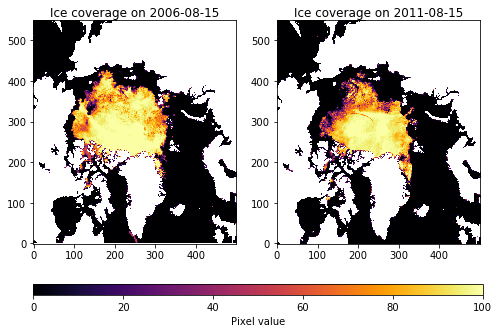

In [9]:
# single colorbar in subplots

from pylab import *

fig1 = plt.figure(figsize = (8,5))

data_2006 = np.load('data/ice_data/ice_data/' + date_2006_str + '.npy')
sp1 = fig1.add_subplot(121)
im = sp1.imshow(data_2006, origin='lower', cmap=plt.cm.inferno, vmin=0, vmax=100)
sp1.set_title("Ice coverage on {0:04d}-{1:02d}-{2:02d}".format(2006, min_date[1], min_date[2]))

data_min = np.load('data/ice_data/ice_data/' + date_min_str + '.npy')
sp2 = fig1.add_subplot(122)
cax = sp2.imshow(data_min, origin='lower', cmap=plt.cm.inferno, vmin=0, vmax=100)
sp2.set_title("Ice coverage on {0:04d}-{1:02d}-{2:02d}".format(min_date[0], min_date[1], min_date[2]))

cbar_ax = fig1.add_axes([0.125, 0.05, 0.78, 0.03])
a = fig1.colorbar(im, cax = cbar_ax, orientation='horizontal')

a.set_label("Pixel value")

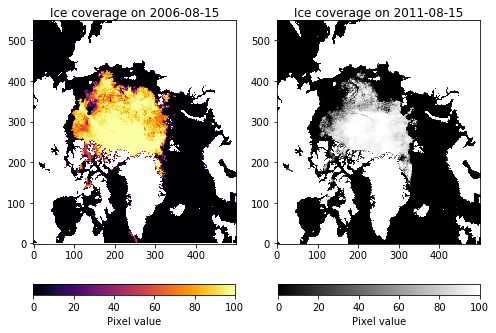

In [10]:
# multiple colorbar in subplots

from pylab import *

fig1 = plt.figure(figsize = (8,5))

data_2006 = np.load('data/ice_data/ice_data/' + date_2006_str + '.npy')
sp1 = fig1.add_subplot(121)
im1 = sp1.imshow(data_2006, origin='lower', cmap=plt.cm.inferno, vmin=0, vmax=100)
sp1.set_title("Ice coverage on {0:04d}-{1:02d}-{2:02d}".format(2006, min_date[1], min_date[2]))
cbar_ax1 = fig1.add_axes([0.125, 0.05, 0.35, 0.03])
a = fig1.colorbar(im1, cax = cbar_ax1, orientation='horizontal')
a.set_label("Pixel value")

data_min = np.load('data/ice_data/ice_data/' + date_min_str + '.npy')
sp2 = fig1.add_subplot(122)
im2 = sp2.imshow(data_min, origin='lower', cmap=plt.cm.gray, vmin=0, vmax=100)
sp2.set_title("Ice coverage on {0:04d}-{1:02d}-{2:02d}".format(min_date[0], min_date[1], min_date[2]))
cbar_ax2 = fig1.add_axes([0.55, 0.05, 0.35, 0.03])
b = fig1.colorbar(im2, cax = cbar_ax2, orientation='horizontal')
b.set_label("Pixel value")

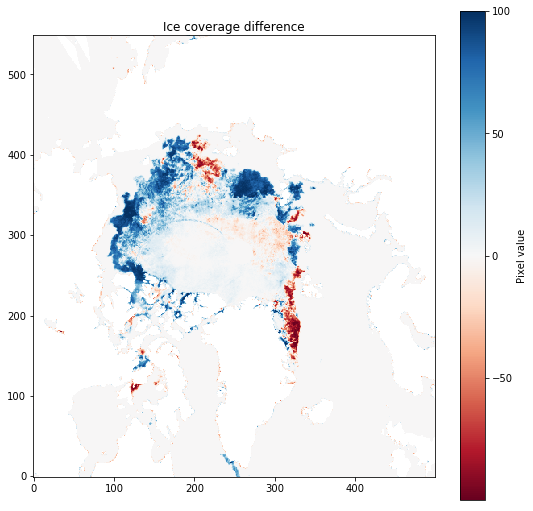

In [12]:
# difference between ice coverage concentration 2006 date and date of minimum ice concentration 99% and above

difference = data_2006 - data_min

plt.figure(figsize = (9,9))

plt.imshow(difference, origin='lower', cmap=plt.cm.RdBu)
plt.title("Ice coverage difference")
colorbar().set_label("Pixel value")

In [13]:
# Part 4

import matplotlib.pyplot as plt
%matplotlib inline

day = 15
month = 1
year = 2006

avg_data_2006 = np.zeros([rows,columns])
avg_data_2011 = np.zeros([rows,columns])
count_2006 = 0
count_2011 = 0

for i in range(137):
    map = "{0:04d}{1:02d}{2:02d}".format(year, month, day)
    data = np.load('data/ice_data/ice_data/' + map + '.npy')
    
    if year == 2006:
        avg_data_2006 += data
        count_2006 += 1
    elif year == 2011:
        avg_data_2011 += data
        count_2011 += 1
    
    if day == 1:
        day = 15
    elif day == 15:
        day = 1
        month = month + 1
        if month == 13:
            month = 1
            year = year + 1
            
avg_data_2006 /= count_2006
avg_data_2011 /= count_2011

print count_2006 , " ", count_2011


23   18


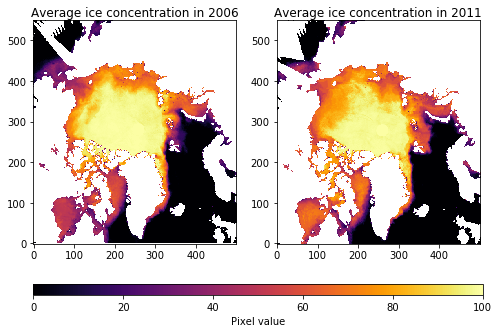

In [14]:
# single colorbar in subplots

from pylab import *

fig1 = plt.figure(figsize = (8,5))

sp1 = fig1.add_subplot(121)
im = sp1.imshow(avg_data_2006, origin='lower', cmap=plt.cm.inferno, vmin=0, vmax=100)
sp1.set_title("Average ice concentration in 2006")

sp2 = fig1.add_subplot(122)
cax = sp2.imshow(avg_data_2011, origin='lower', cmap=plt.cm.inferno, vmin=0, vmax=100)
sp2.set_title(("Average ice concentration in 2011"))

cbar_ax = fig1.add_axes([0.125, 0.05, 0.78, 0.03])
a = fig1.colorbar(im, cax = cbar_ax, orientation='horizontal')

a.set_label("Pixel value")